
数据前5行:
    user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
4   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   

  event_action                 event_time  
0        added  2024-11-26 20:28:37+08:00  
1        added  2024-11-26 20:42:57+08:00  
2        added  2024-11-27 04:10:46+08:00  
3        added  2024-11-27 17:43:50+08:00  
4        added  2024-11-27 19:56:34+08:00  

国家与地区分布:
 country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Sw

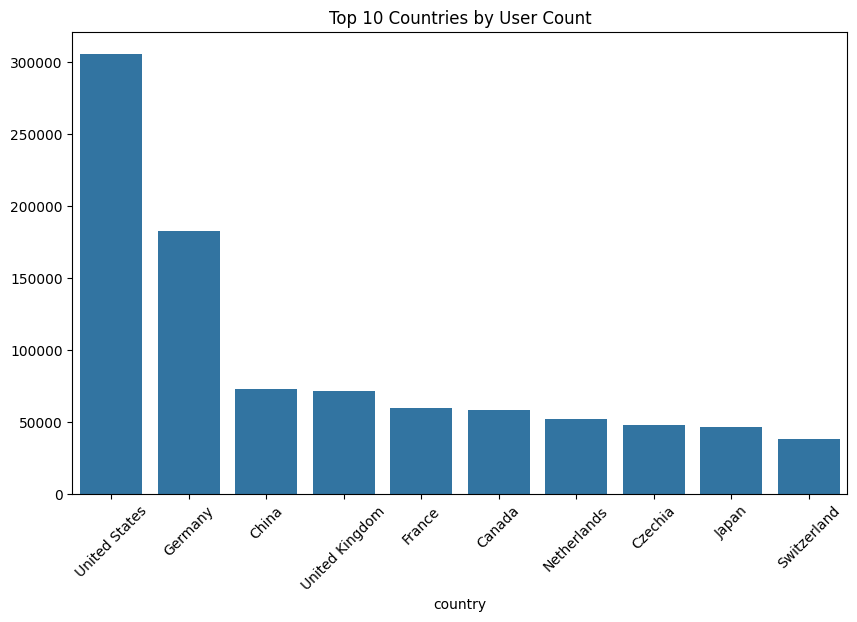


地区密度分析:
 location
Germany          107747
Prague            37757
Japan             26986
Palo Alto, CA     19215
UK                17789
NYC               16381
San Francisco     16271
Paris, France     16021
Switzerland       15555
Houston, TX       15449
Name: count, dtype: int64


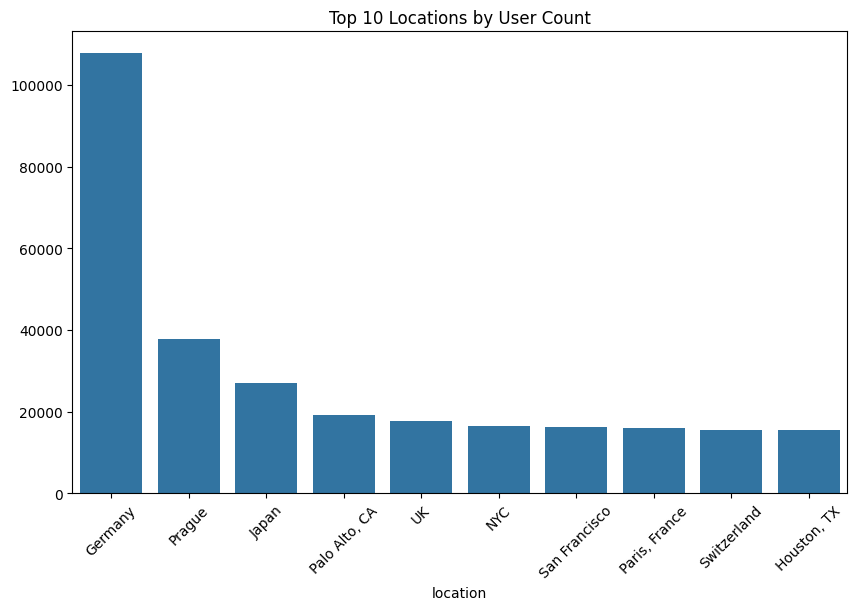

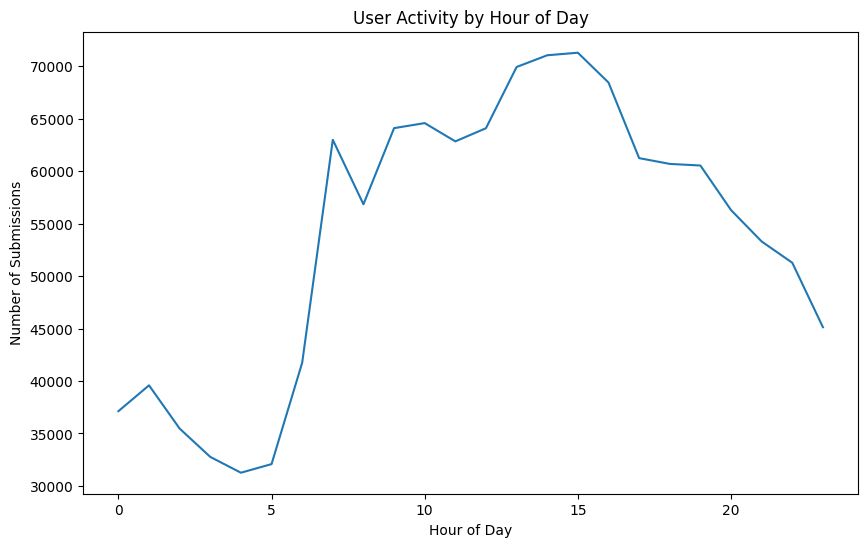


提交次数统计:
 user_id
158862      37960
11146458    36400
28706372    30616
1580956     20300
40306929    19215
43724913    14505
9824526     12905
50149701    12704
195327      11218
663432      10764
Name: count, dtype: int64


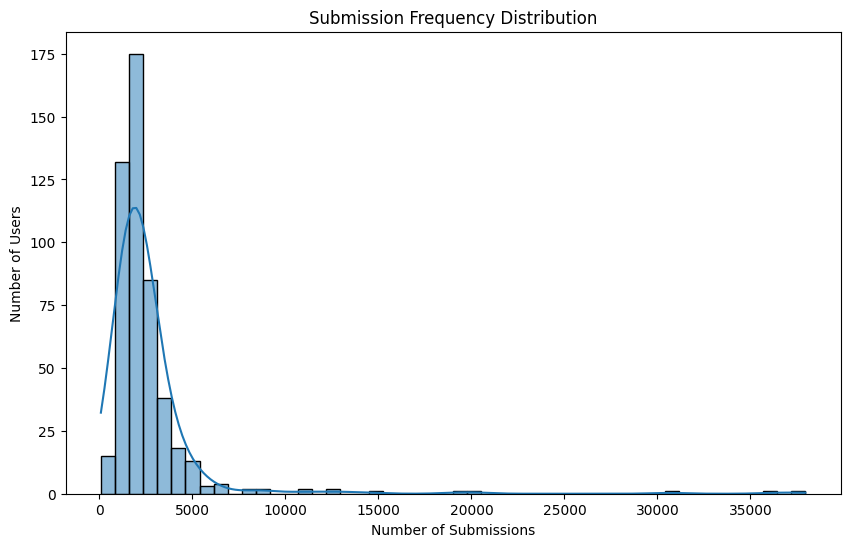


高活跃用户50以上用户数: 497
低活跃用户5以下用户数: 0

使用活动类型分析:
 event_type
PushEvent                        410955
PullRequestEvent                 201128
IssueCommentEvent                174806
PullRequestReviewEvent           151843
CreateEvent                      104371
DeleteEvent                       96999
PullRequestReviewCommentEvent     86198
IssuesEvent                       51205
ReleaseEvent                       9455
WatchEvent                         3809
Name: count, dtype: int64


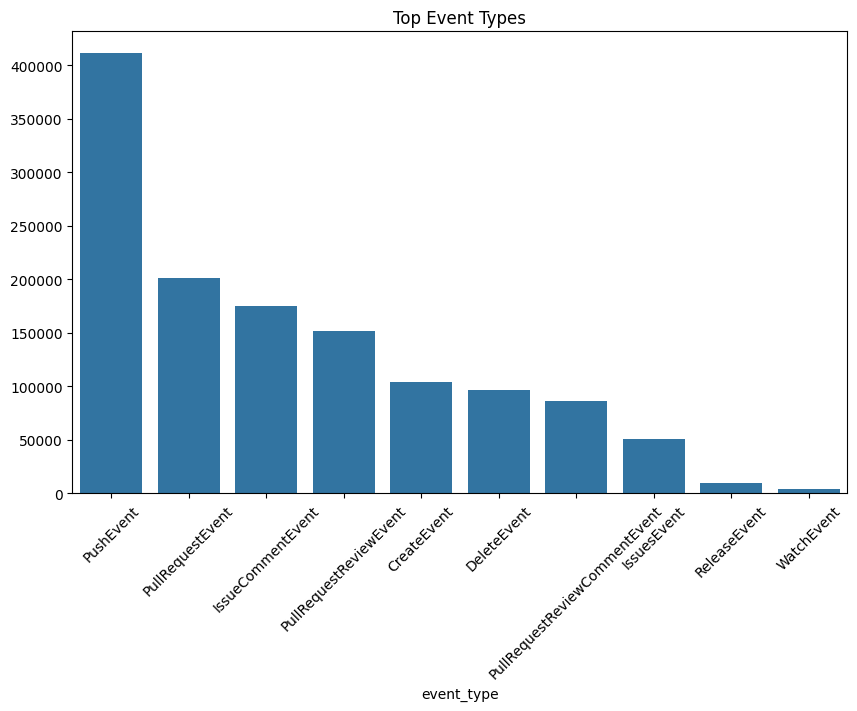


活动为动习惯分析:
 event_action
added        617218
created      411961
closed       173489
opened        76406
published      9455
started        3809
reopened       2438
Name: count, dtype: int64


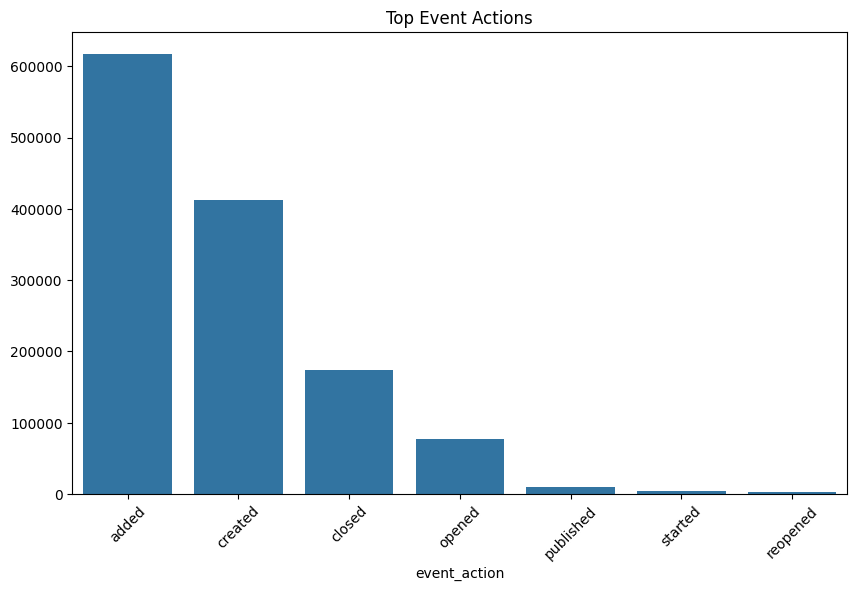


数据洞察分析完成，生成图表与分析结果。


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. 加载数据
file_path = 'users_combined_info_500.csv'  # 系统提供的数据进行分析
data = pd.read_csv(file_path)
print("\n数据前5行:\n", data.head())

# 2. 人口统计分析
def population_statistics_analysis(df):
    # 国家与地区分布
    country_counts = df['country'].value_counts()
    print("\n国家与地区分布:\n", country_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=country_counts[:10].index, y=country_counts[:10].values)
    plt.title('Top 10 Countries by User Count')
    plt.xticks(rotation=45)
    plt.show()

    # 城市分级分析
    location_counts = df['location'].value_counts()
    print("\n地区密度分析:\n", location_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=location_counts[:10].index, y=location_counts[:10].values)
    plt.title('Top 10 Locations by User Count')
    plt.xticks(rotation=45)
    plt.show()

    # 时区分析
    df['hour'] = pd.to_datetime(df['event_time']).dt.hour
    hour_counts = df['hour'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=hour_counts.index, y=hour_counts.values)
    plt.title('User Activity by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Submissions')
    plt.show()

# 3. 协作行为分析
def collaboration_behavior_analysis(df):
    # 提交频率统计
    submission_counts = df['user_id'].value_counts()
    print("\n提交次数统计:\n", submission_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.histplot(submission_counts, bins=50, kde=True)
    plt.title('Submission Frequency Distribution')
    plt.xlabel('Number of Submissions')
    plt.ylabel('Number of Users')
    plt.show()

    # 高活跃用户与低活跃用户
    high_active_users = submission_counts[submission_counts > 50]
    low_active_users = submission_counts[submission_counts < 5]
    print(f"\n高活跃用户50以上用户数: {len(high_active_users)}")
    print(f"低活跃用户5以下用户数: {len(low_active_users)}")

# 4. 其他维度分析
def additional_insights(df):
    # 使用活动类型分析
    event_type_counts = df['event_type'].value_counts()
    print("\n使用活动类型分析:\n", event_type_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=event_type_counts[:10].index, y=event_type_counts[:10].values)
    plt.title('Top Event Types')
    plt.xticks(rotation=45)
    plt.show()

    # 活动为动习惯分析 (event_action)
    event_action_counts = df['event_action'].value_counts()
    print("\n活动为动习惯分析:\n", event_action_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=event_action_counts[:10].index, y=event_action_counts[:10].values)
    plt.title('Top Event Actions')
    plt.xticks(rotation=45)
    plt.show()

# 执行分析
population_statistics_analysis(data)
collaboration_behavior_analysis(data)
additional_insights(data)

print("\n数据洞察分析完成，生成图表与分析结果。")
